In [ ]:
!pip install tweepy

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
ConsumerKey='MRc5y3xRcrySv7e9lcSbAejSB'
consumerSecret ='zTYijE0uta9xYRFpdJWC3SzW7zTT8oUxN460OpJWs7VrGUTUbt'

accessToken ='2488080373-a6Oi0DTaOETdaydEgtcRLgJvE4VKWdxXh7N47Si'
accessTokenSecret ='ROiubnZsc6Kx9fq0wt9uL62qKUqrJakZeJD1yGKICJ9l3'

In [ ]:
# Create authentication 
authenticate= tweepy.OAuthHandler(ConsumerKey, consumerSecret)

#set the access token and access token secret 
authenticate.set_access_token(accessToken, accessTokenSecret)

#create the api object while passing the auth information 
api = tweepy.API(authenticate,wait_on_rate_limit=True)
                        

In [ ]:
#extract 100 tweets 
post = api.user_timeline(screen_name="makemytrip", count=100, lang="en", tweet_mode="extended")

i=1
#print last 5 twwets from the post 
print("show the 5 recent tweets :\n ")
for tweet in post[0:5]:
  print(str(i)+ ' )'+ tweet.full_text+ '\n')
  i=i+1



show the 5 recent tweets :
 
1 )@yuva213 Hey, currently these are pure art collectibles that could be traded on OpenSea. The current proceeds from the sales are for supporting sustainable tourism.

2 )@anand_shirke @Param_eth Hey, currently these are pure art collectibles that could be traded on OpenSea. The current proceeds from the sales are for supporting sustainable tourism.

3 )@Sumrujan Hey, currently these are pure art collectibles that could be traded on OpenSea. The current proceeds from the sales are for supporting sustainable tourism.

4 )Proud to launch our first limited-edition travel NFT collection – Virtual Vacations!

Each art is a stunning kaleidoscopic meta-world representation of some of India’s travel destinations.

Sale is now live: https://t.co/DNQBQWJGPz

@ngageNFT @0xPolygon

 #NFTs #nftcollectors https://t.co/ClqY30UWkx

5 )Many States &amp; UTs
Many cultures
Many languages
Many religions 
One emotion - India 🇮🇳
Here's a tribute to the beautiful diversity of ou

In [ ]:
# Store thease tweets into the dataframe

df = pd.DataFrame( [tweet.full_text for tweet in post], columns=['tweet'])

#show the first 5 tweets 

df.head(5)

,tweet
0,"@yuva213 Hey, currently these are pure art col..."
1,"@anand_shirke @Param_eth Hey, currently these ..."
2,"@Sumrujan Hey, currently these are pure art co..."
3,Proud to launch our first limited-edition trav...
4,Many States &amp; UTs\nMany cultures\nMany lan...


In [ ]:
#clean text 

# create a function to clean the tweets

def cleantxt(text):
  text= re.sub(r'@[A-Za-b0-9]+', '', text)   #remove the @mention 
  text= re.sub(r'#', '', text)               # remove the hashtag 
  text= re.sub(r'RT[\s]+', '', text)         # remove RT 
  text= re.sub(r'https?:\/\/\S+', '', text)  # remove any link in the tweet
  return text


#cleaning the data , applying the function in tweet column 
df['tweet']= df['tweet'].apply(cleantxt)   


In [ ]:
df


,tweet
0,"@yuva213 Hey, currently these are pure art col..."
1,"nand_shirke ram_eth Hey, currently these are p..."
2,"umrujan Hey, currently these are pure art coll..."
3,Proud to launch our first limited-edition trav...
4,Many States &amp; UTs\nMany cultures\nMany lan...
...,...
95,"Lounging all the way or getaway vacay, what's ..."
96,Saving the best for last! Check out @rockyandm...
97,"Parvatah, Rocky &amp; Mayur's Boutique homesta..."
98,"While bingeing on sights &amp; bites of Bir, R..."


In [ ]:
#create a function to get subjectivity   

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity


#crete a function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity 

#CREATE TWO COLUMNS WITH SUBJECTIVITY AND POLARITY NAME 

df['Subjectivity']=df['tweet'].apply(getSubjectivity)
df['Polarity']=df['tweet'].apply(getPolarity)

#show the new data with new column

df

,tweet,Subjectivity,Polarity
0,"@yuva213 Hey, currently these are pure art col...",0.387500,0.116071
1,"nand_shirke ram_eth Hey, currently these are p...",0.387500,0.116071
2,"umrujan Hey, currently these are pure art coll...",0.387500,0.116071
3,Proud to launch our first limited-edition trav...,0.708333,0.437216
4,Many States &amp; UTs\nMany cultures\nMany lan...,0.600000,0.570000
...,...,...,...
95,"Lounging all the way or getaway vacay, what's ...",0.600000,0.337500
96,Saving the best for last! Check out @rockyandm...,0.283333,0.275000
97,"Parvatah, Rocky &amp; Mayur's Boutique homesta...",0.500000,-0.036250
98,"While bingeing on sights &amp; bites of Bir, R...",0.500000,0.781250


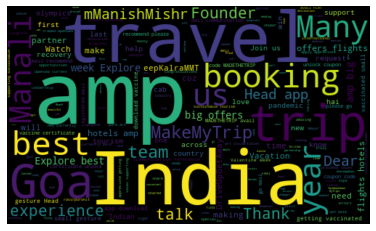

In [ ]:
# plot the word cloud

allWords = ' '.join( [twts for twts in df['tweet']])
wordCloud= WordCloud(width= 500, height = 300 , random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['analysis']= df['Polarity'].apply(getAnalysis)

df 

,tweet,Subjectivity,Polarity,analysis
0,"@yuva213 Hey, currently these are pure art col...",0.387500,0.116071,Positive
1,"nand_shirke ram_eth Hey, currently these are p...",0.387500,0.116071,Positive
2,"umrujan Hey, currently these are pure art coll...",0.387500,0.116071,Positive
3,Proud to launch our first limited-edition trav...,0.708333,0.437216,Positive
4,Many States &amp; UTs\nMany cultures\nMany lan...,0.600000,0.570000,Positive
...,...,...,...,...
95,"Lounging all the way or getaway vacay, what's ...",0.600000,0.337500,Positive
96,Saving the best for last! Check out @rockyandm...,0.283333,0.275000,Positive
97,"Parvatah, Rocky &amp; Mayur's Boutique homesta...",0.500000,-0.036250,Negative
98,"While bingeing on sights &amp; bites of Bir, R...",0.500000,0.781250,Positive


In [ ]:
# print all positive tweet 

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['analysis'][i]=='Positive'):
    print(str(j)+ ')' +sortedDF['tweet'][i])
    print()
    j=j+1

1)@yuva213 Hey, currently these are pure art collectibles that could be traded on OpenSea. The current proceeds from the sales are for supporting sustainable tourism.

2)nand_shirke ram_eth Hey, currently these are pure art collectibles that could be traded on OpenSea. The current proceeds from the sales are for supporting sustainable tourism.

3)umrujan Hey, currently these are pure art collectibles that could be traded on OpenSea. The current proceeds from the sales are for supporting sustainable tourism.

4)Proud to launch our first limited-edition travel NFT collection – Virtual Vacations!

Each art is a stunning kaleidoscopic meta-world representation of some of India’s travel destinations.

Sale is now live: 

@ngageNFT xPolygon

 NFTs nftcollectors 

5)Many States &amp; UTs
Many cultures
Many languages
Many religions 
One emotion - India 🇮🇳
Here's a tribute to the beautiful diversity of our motherland and to the builders, protectors and bravehearts of our nation
OneIndia 

Happy

In [ ]:
df.groupby(['analysis'], sort = False).count()

,tweet,Subjectivity,Polarity
analysis,,,
Positive,60,60,60
Negative,14,14,14
Neutral,26,26,26


In [ ]:
#Print all the neagative tweets as per the polarity score 

j=1 
sortedDF = df.sort_values(by =['Polarity'], ascending= 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['analysis'][i]=='Negative'):
    print(str(j)+ ') '+ sortedDF['tweet'][i])
    print()
    j=j+1


1) Check upon your friends who have had major travel plans cancelled. They’re not okay!
TravelPlans Friends Cleartrip

2) hash98 hash98 - We are sorry to hear that you have not received the refund. Let me get this checked with our refunds team and we will update you in next 2 to 4 hours.

3) @startupjunta @startupjunta- Sorry to hear that the prices on our app did not meet your expectations. The option to connect to our customer support is currently not available without a booking ID.

4) jithSu30373900 jithSu30373900 - As per our discussion on call, we requested you to make booking without any coupon code and we will raise it with our technical team to refund the eligible cash back amount. As you were not agree for this and you wish to book it with other service providers.

5) jithSu30373900 jithSu30373900 - We are sorry to hear that you are unable to avail the benefit of coupon for your booking. Please DM us the error screenshot and your contact number so that we can check and update

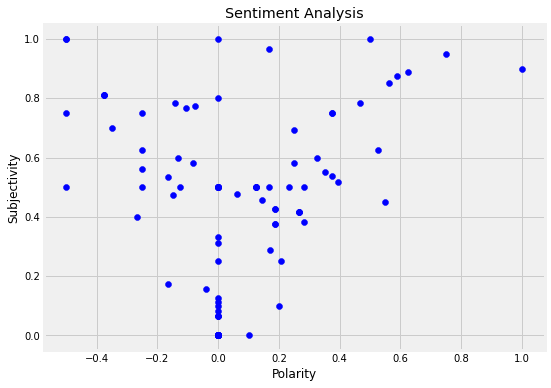

In [ ]:
#plot the scatter plot against the polarity and subjectivity 

plt.figure(figsize =(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
# get the percentage of positive tweets

ptweets= df[df.analysis=='Positive']
ptweets = ptweets['tweet']
percentage_ptweets = round((ptweets.shape[0]/ df.shape[0])*100,1)

percentage_ptweets 

39.0

In [ ]:
#Negative tweet 

Ntweets= df[df.analysis=='Negative']
Ntweets = Ntweets['tweet']
percentage_Ntweets = round((Ntweets.shape[0]/ df.shape[0])*100,1)

percentage_Ntweets

23.0

In [ ]:
#Neutral tweet 

Neutral =100-(percentage_ptweets + percentage_Ntweets)
Neutral

38.0

In [ ]:
final_analysis_percent={'percentage_ptweets' : [39], 'percentage_Ntweets': [38], 'Neutral': [23]}

final_analysis_percent = pd.DataFrame(final_analysis_percent)
final_analysis_percent

,percentage_ptweets,percentage_Ntweets,Neutral
0,39,38,23


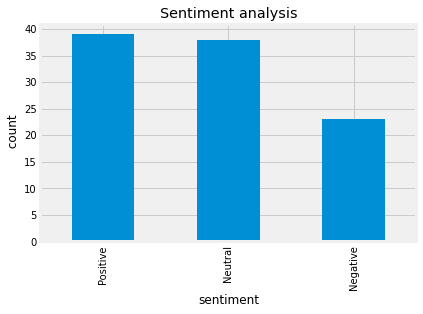

In [ ]:
#show the value count 
df['analysis'].value_counts()


#plot and visualize the counts 

plt.title('Sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel(' count')
df['analysis'].value_counts().plot(kind='bar')
plt.show()